In [1]:
import sys
sys.path.append('/Library/Python/2.7/site-packages')
import emcee
import lal
import lalsimulation
import numpy as np
import matplotlib.pyplot as plt

## SEOBNRv4HM waveform module

In [2]:
def pSEOBNRv4HM_waveform(dtauinv220):

        # Define binary parameters
        nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
        m1 = 50.0*lal.MSUN_SI
        m2 = 50.0*lal.MSUN_SI
        phi_c = 0.
        f_start22 = 30. #Frequency of the 22 mode at which the signal starts
        distance = 500.0*1e6*lal.PC_SI
        spin1_z = 0.
        spin2_z =  0.
        deltaT = 1./2048.
        domega220_theor = 0.
        #dtauinv220_theor = 0.
        domega210_theor = 0.
        dtauinv210_theor = 0.
        domega330_theor = 0.
        dtauinv330_theor = 0.
        domega440_theor = 0.
        dtauinv440_theor = 0.
        domega550_theor = 0.
        dtauinv550_theor = 0.

        plt.figure(figsize=(12,5))

        # Generate the modes
        sphtseries, dyn, dynHi = lalsimulation.SimIMRSpinAlignedEOBModes(deltaT, m1, m2, f_start22, distance, spin1_z, spin2_z,41, 0., 0., 0.,0.,0.,0.,0.,0.,1.,1., domega220_theor, dtauinv220, domega210_theor, dtauinv210_theor, domega330_theor, dtauinv330_theor, domega440_theor, dtauinv440_theor, domega550_theor, dtauinv550_theor, nqcCoeffsInput, 0)

        # Read the modes
        hlm = {}

        ##55 mode
        modeL = sphtseries.l
        modeM = sphtseries.m
        print 'Loading mode', modeL, modeM
        h55 = sphtseries.mode.data.data #This is h_55
        hlm[(modeL, modeM)] = h55

        ##44 mode
        modeL = sphtseries.next.l
        modeM = sphtseries.next.m
        print 'Loading mode', modeL, modeM
        h44 = sphtseries.next.mode.data.data #This is h_44
        hlm[(modeL, modeM)] = h44

        ##21 mode
        modeL = sphtseries.next.next.l
        modeM = sphtseries.next.next.m
        print 'Loading mode', modeL, modeM
        h21 = sphtseries.next.next.mode.data.data #This is h_21
        hlm[(modeL, modeM)] = h21

        ##33 mode
        modeL = sphtseries.next.next.next.l
        modeM = sphtseries.next.next.next.m
        print 'Loading mode', modeL, modeM
        h33 = sphtseries.next.next.next.mode.data.data #This is h_33
        hlm[(modeL, modeM)] = h33

        ##22 mode
        modeL = sphtseries.next.next.next.next.l
        modeM = sphtseries.next.next.next.next.m
        print 'Loading mode', modeL, modeM
        h22 = sphtseries.next.next.next.next.mode.data.data #This is h_22
        hlm[(modeL, modeM)] = h22

        ##time array (s)
        time_array = np.arange(0,len(h22)*deltaT,deltaT)

        # Generate the full waveform
        paramdict = lal.CreateDict()
        lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv220(paramdict, dtauinv220)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv210(paramdict, dtauinv210_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv330(paramdict, dtauinv330_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv440(paramdict, dtauinv440_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550_theor)
        lalsimulation.SimInspiralWaveformParamsInsertDTauInv550(paramdict, dtauinv550_theor)
        inclination = 0.
        hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)

        return time_array, hp, hc

## Creating Injection/Data

/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2


/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handlers could be found for logger "matplotlib.legend"
/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


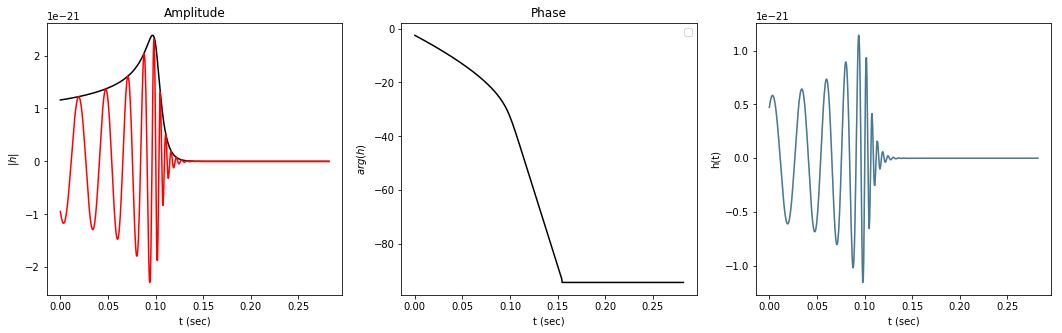

In [3]:
import pycbc
from pycbc import detector

dtauinv220 = 0.
t_data, hp, hc = pSEOBNRv4HM_waveform(dtauinv220)
h = hp.data.data - 1j*hc.data.data

plt.figure(figsize=(18,5))
# Plot the waveform
plt.subplot(131)
plt.plot(t_data, np.abs(h), color='k')
plt.plot(t_data, h, color='r')
plt.xlabel('t (sec)')
plt.ylabel('$|h|$')
plt.title('Amplitude')
#plt.xlim([4, time_array[-1]])
plt.subplot(132)
plt.plot(t_data,np.unwrap(np.angle(h)), color='k')
plt.xlabel('t (sec)')
plt.ylabel('$arg(h)$')
plt.title('Phase') 
plt.xlabel('t (sec)')  
#plt.xlim([4, time_array[-1]])
plt.legend()
plt.subplots_adjust(hspace=0.6)
plt.hold(True)

ra, dec, pol = 0., 0., 0.

Fp,Fc = detector.overhead_antenna_pattern(ra, dec, pol)
signal=Fp*hp.data.data+Fc*hc.data.data

noise = np.random.randn(len(signal))*1e-21

data = signal# + noise

plt.subplot(133)
plt.plot(t_data, signal)
plt.plot(t_data, data, alpha=0.2)
plt.xlabel('t (sec)')  
plt.ylabel('h(t)')
plt.show()

## $\text{emcee}$ modules for Parameter Estimation

In [4]:
def lnlike(param_vec, data, t_data):
        """
        compute the log likelihood
        
        inputs: 
        param_vec : vector of parameters 
        dr, di, 
        freq : Fourier freq 
        psd : psd vector 
        flow,fcut
        
        output: 
        log_likelhood 
        """

        # unpacking the parameter vector 
        dtauinv220, = param_vec

        # generate the waveform 
        t_signal, hp, hc = pSEOBNRv4HM_waveform(dtauinv220)
        h = hp.data.data - 1j*hc.data.data

        ra, dec, pol = 0., 0., 0.

        Fp,Fc = detector.overhead_antenna_pattern(ra, dec, pol)
        signal=Fp*hp.data.data+Fc*hc.data.data

        t_start = max(t_data[0], t_signal[0])
        t_end = min(t_data[-1], t_signal[-1])
        
        band_idx_data, = np.where((t_data > t_start) & (t_data < t_end))
        band_idx_signal, = np.where((t_signal > t_start) & (t_signal < t_end))
        
        like = -np.dot(data[band_idx_data]-signal[band_idx_signal],data[band_idx_data]-signal[band_idx_signal])
        
        return like#log-likelihood


def lnprior(param_vec):
        dtauinv220 = param_vec
        if -1. < dtauinv220 < 1.0:
            return 0.
        return -np.inf



def lnprob(param_vec):
        lp = lnprior(param_vec)
        if not np.isfinite(lp):
                return -np.inf
        return lp + lnlike(param_vec, data, t_data)

In [ ]:
ndim, nwalkers = 1, 100
num_threads = 1
num_iter = 100

result = 0.
dtauinv220_init = result
pos = [result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, threads=num_threads)
sampler.run_mcmc(pos, num_iter)

dtauinv220_chain = sampler.chain[:, :, 0].T
samples = sampler.chain[:, :, :].reshape((-1, ndim))

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

/Users/abhirupghosh/src/pycbc/lib/python2.7/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading m

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3

Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3 3
Loading mode 2 2
Loading mode 5 5
Loading mode 4 4
Loading mode 2 1
Loading mode 3